## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s

In [235]:
import pandas as pd
import numpy as np 
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [236]:
boston_data = load_boston()

boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [237]:
boston_data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [238]:
# Lets create de dataframe to manage the data

bosdf = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)

bosdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [239]:
# We have a df with the features columns but we must add the target column, in this case was 'MEDV'

bosdf['MEDV'] = boston_data.target

bosdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [240]:
bosdf.shape

(506, 14)

In [241]:
# Let's check if we have Missing values:

bosdf.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [242]:
bosdf.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [243]:
# So in missing values terms we have data cleaed. Lets check the correlations between the features and the target

corr = bosdf.corr()

corr.iloc[:,-1].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text major ticklabel objects>)

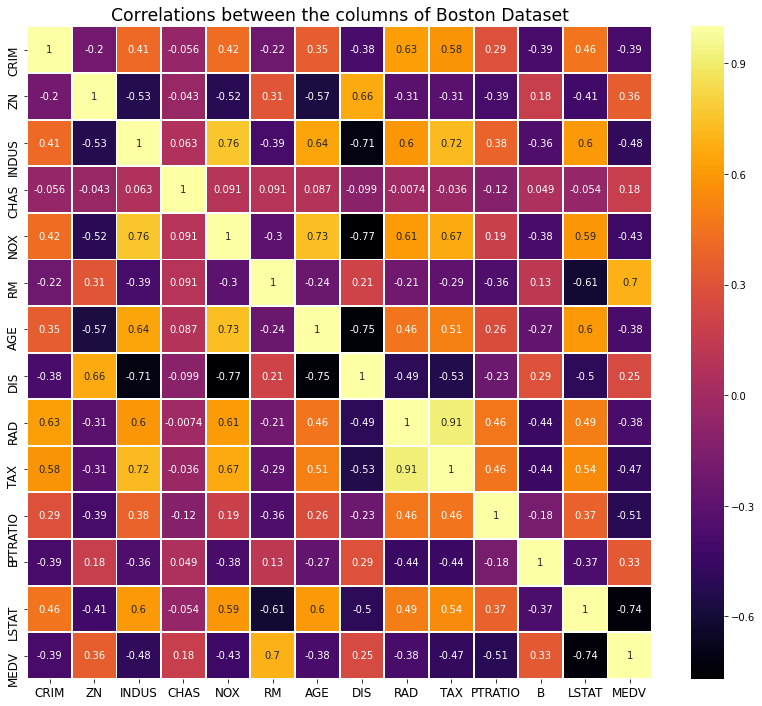

In [244]:
plt.figure(figsize=[14,12])
sns.heatmap(data=corr, annot=True, linewidths=0.9, cmap="inferno")
plt.title('Correlations between the columns of Boston Dataset', size='xx-large')
plt.xticks(size='large')
plt.yticks(size='large')

In [245]:
bosmelted

,variable,value
0,CRIM,0.000013
1,CRIM,0.000058
2,CRIM,0.000058
3,CRIM,0.000071
4,CRIM,0.000150
...,...,...
7079,MEDV,0.046288
7080,MEDV,0.042131
7081,MEDV,0.048626
7082,MEDV,0.045051


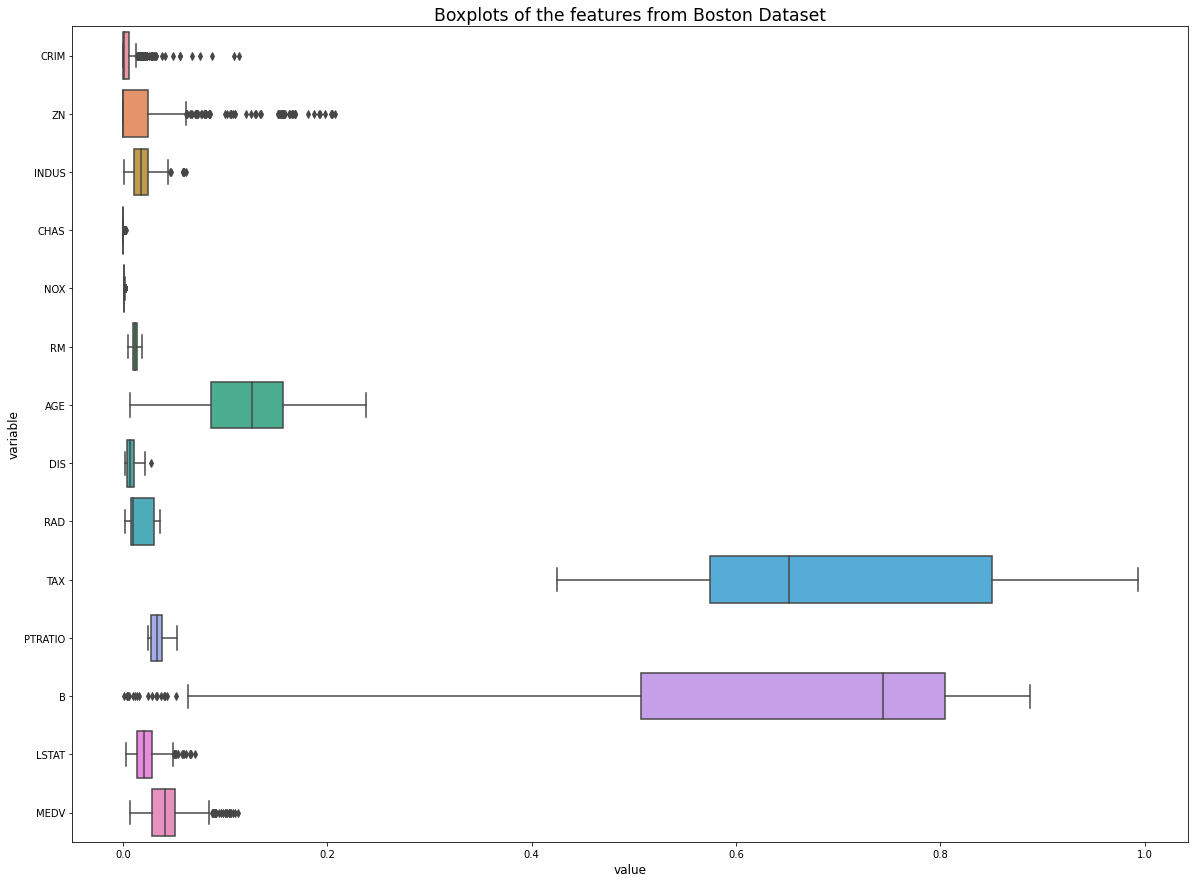

In [246]:
# Let's indentify outliers of the dataset and see what we do with them. First we are going to try the IQR (Interquantile range) after trying to visualize with boxplots the quantiles of the features:

norm = normalize(X=bosdf, axis=1, norm='l2')
bosnorm = pd.DataFrame(data=norm, columns=bosdf.columns)

bosmelted = pd.melt(bosnorm)

plt.figure(figsize=[20,15])
plt.title('Boxplots of the features from Boston Dataset', size='xx-large')
plt.ylabel(ylabel='Features', size='large')
plt.xlabel(xlabel='Normalized values', size='large')
sns.boxplot(x=bosmelted.value, y=bosmelted.variable)

# As we can se the dots outside the box are considered as outliers, so there are outliers at least in 7 features.

In [247]:
# Let's see the IQR for each feature

Q1 = bosdf.quantile(0.25)
Q3 = bosdf.quantile(0.75)
IQR = round(Q3 - Q1, 2)

IQR

CRIM         3.60
ZN          12.50
INDUS       12.91
CHAS         0.00
NOX          0.18
RM           0.74
AGE         49.05
DIS          3.09
RAD         20.00
TAX        387.00
PTRATIO      2.80
B           20.85
LSTAT       10.01
MEDV         7.98
dtype: float64

In [248]:
# Let's quantify the outliers with the IQR method:

bos_IQR = (bosdf < (Q1 - 1.5 * IQR)) |(bosdf > (Q3 +
1.5 * IQR))

bos_IQR[bos_IQR == True].sum()

CRIM       66.0
ZN         68.0
INDUS       0.0
CHAS       35.0
NOX         0.0
RM         30.0
AGE         0.0
DIS         5.0
RAD         0.0
TAX         0.0
PTRATIO    15.0
B          77.0
LSTAT       7.0
MEDV       40.0
dtype: float64

In [249]:
# Let's indentify outliers of the dataset with the z-score:

z = np.abs(stats.zscore(bosdf))

np.where(z > 3)

# The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 3 (treshold)

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466]),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [250]:
bosdf = bosdf[(z < 3).all(axis=1)]

In [251]:
bosdf.shape

(415, 14)

In [252]:
# We are going to divide the dataset in X for the feature values and y for the target value that we want to predict, and divide the data in train data, and test data to testing the model later:

X = bosdf.iloc[:,0:-1].to_numpy()

y = bosdf.iloc[:,-1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [253]:
# Now we are going to create the linear_regression object:

lr = LinearRegression(n_jobs=-1)

lr.fit(X_train, y_train)

prediction = lr.predict(X_test)

prediction

array([24.81401102, 26.30780344, 13.38574617, 17.61783365, 11.63522544,
       28.51346387, 35.56322446, 29.69112617, 33.38765637, 12.20694698,
       22.61427248, 25.35143363,  7.95129851, 39.61125863, 16.92020744,
       22.47792344, 22.03733859, 25.6088867 , 20.30180021, 32.9845554 ,
       18.92764032, 19.92685639, 23.06267747, 28.28504448, 26.2598477 ,
       23.19572161, 32.3624013 , 18.87760531, 24.57940094,  8.57295423,
       19.96835693, 34.19941106, 17.01253582, 25.11251065, 22.37802208,
       28.67043336, 21.13358539, 18.84198451, 21.01234385, 22.72942469,
       22.05974551, 38.28962112, 30.49875422, 15.93301359, 16.85770306,
       23.03219209, 19.49247808, 32.76740442, 15.79382893, 15.50218987,
       10.30364951, 25.10009175, 19.07199832, 16.87303014, 35.61466721,
       25.66163431, 29.77733154, 19.3327238 , 27.45692104,  9.67023242,
       16.12873493, 25.49210316, 31.66330582, 32.80906429, 23.27856118,
       17.84722014, 22.1161073 , 24.87109188,  8.04210765, 26.52

In [254]:
# Lets chec the perform of the model:

round(lr.score(X_test, y_test), 2)

0.78

In [255]:
# If we create with the X-data polynomical relations, will improve the model?

poli = PolynomialFeatures(degree=2, include_bias= True, interaction_only=False)

X_poli = poli.fit_transform(X)

In [256]:
X_train_poli, X_test_poli, y_train, y_test = train_test_split(X_poli, y, test_size=0.2)

lr.fit(X_train_poli, y_train)

lr.predict(X_test_poli)

array([25.28986001, 23.23949981, 23.67778969, 24.67123723, 30.03766274,
       18.37167144, 33.73306727, 21.29883718, 26.93690443, 33.09459257,
       11.45183611, 23.35741663, 20.64093041, 13.13579273, 13.06348157,
       20.47602105, 12.60102463, 20.52533007, 27.31899953, 22.26515651,
       24.24875379, 20.09530783, 30.99027896, 20.29953647, 17.46962428,
       21.85634422, 23.36465383, 17.1280899 , 42.06587172, 34.2802341 ,
       12.98856544, 17.80262017, 26.38665819, 25.16329503, 21.67589355,
       55.56076002, 28.81783104, 22.32419491, 40.05125117, 22.9475646 ,
       29.3821013 , 16.1733911 , 33.949898  , 13.38044333, 11.55461788,
       19.66812706, 24.74031138, 12.87441397, 24.05377865, 13.72991347,
       13.60786724, 20.03579664, 22.43038416, 36.26491857, 14.49225259,
       20.5389092 , 22.41978717, 20.86223745, 22.7146585 ,  7.30383253,
       15.7087853 , 20.56594014, 24.93264174, 34.53099608, 22.37306499,
       30.48162913, 25.26649499, 15.72677803, 27.12148762, 24.11

In [257]:
# Yes!! It improve the score!!

round(lr.score(X_test_poli, y_test), 2)

0.85